# Fundamental Machine Learning 

### Dataset: Melbourne Housing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")


file_path = './dataset/melb_data.csv'
df = pd.read_csv(file_path)

In [2]:
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [3]:
df.shape

(13580, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [6]:
df.describe(include='O')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,5 Margaret St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


## Data Cleansing

In [7]:
df.isna().sum()/df.shape[0]*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

In [8]:
df['Car'].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [9]:
df['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

## Handle Missing Value

In [10]:
median_car = df['Car'].median()
df['Car'] = df['Car'].fillna(median_car)

In [11]:
median_ba = df['BuildingArea'].median()
df['BuildingArea'] = df['BuildingArea'].fillna(median_ba)

In [12]:
median_yb = df['YearBuilt'].median()
df['YearBuilt'] = df['YearBuilt'].fillna(median_yb)

In [13]:
mode_ca = df['CouncilArea'].mode()[0]
df['CouncilArea'] = df['CouncilArea'].fillna(mode_ca)

In [14]:
#more check isna
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# Exploratory Data Analysis

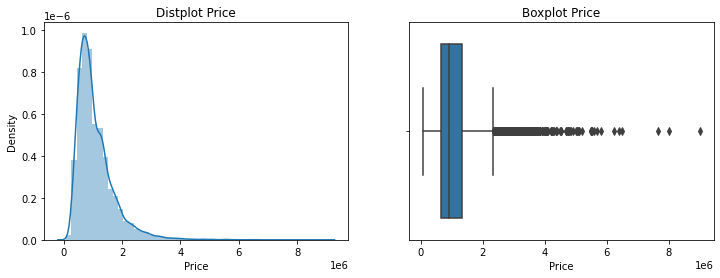

In [15]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title('Distplot Price')
axis[1].set_title('Boxplot Price')

# Plot Partner column
ax = sns.distplot(df['Price'], ax=axis[0])
ax = sns.boxplot(df['Price'], ax=axis[1])

Text(0.5, 1.0, 'Price Home')

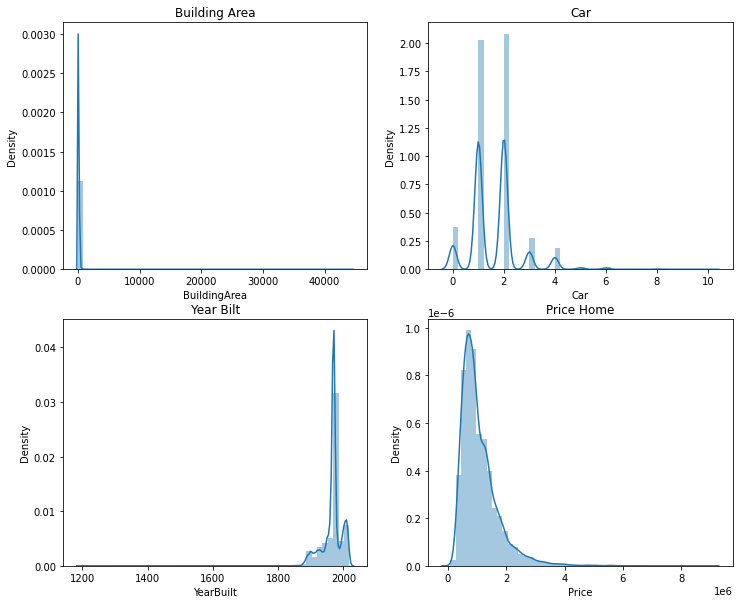

In [16]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))


sns.distplot(df['BuildingArea'],ax=ax[0][0])
ax[0][0].set_title('Building Area')

sns.distplot(df['Car'],ax=ax[0][1])
ax[0][1].set_title('Car')

sns.distplot(df['YearBuilt'],ax=ax[1][0])
ax[1][0].set_title('Year Bilt')

sns.distplot(df['Price'],ax=ax[1][1])
ax[1][1].set_title('Price Home')

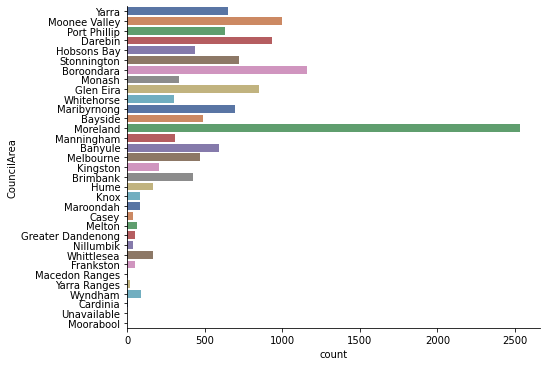

In [17]:
sns.catplot(y='CouncilArea', kind='count', data=df, aspect=1.5, palette = 'deep')

In [18]:
df['CouncilArea'].value_counts()

Moreland             2532
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

## See The Correlation

In [19]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
df_encode = encoder.fit_transform(df.drop(columns=['Price']), df['Price'])
df_encode = pd.concat([df_encode, df['Price']], axis=1)

<AxesSubplot:>

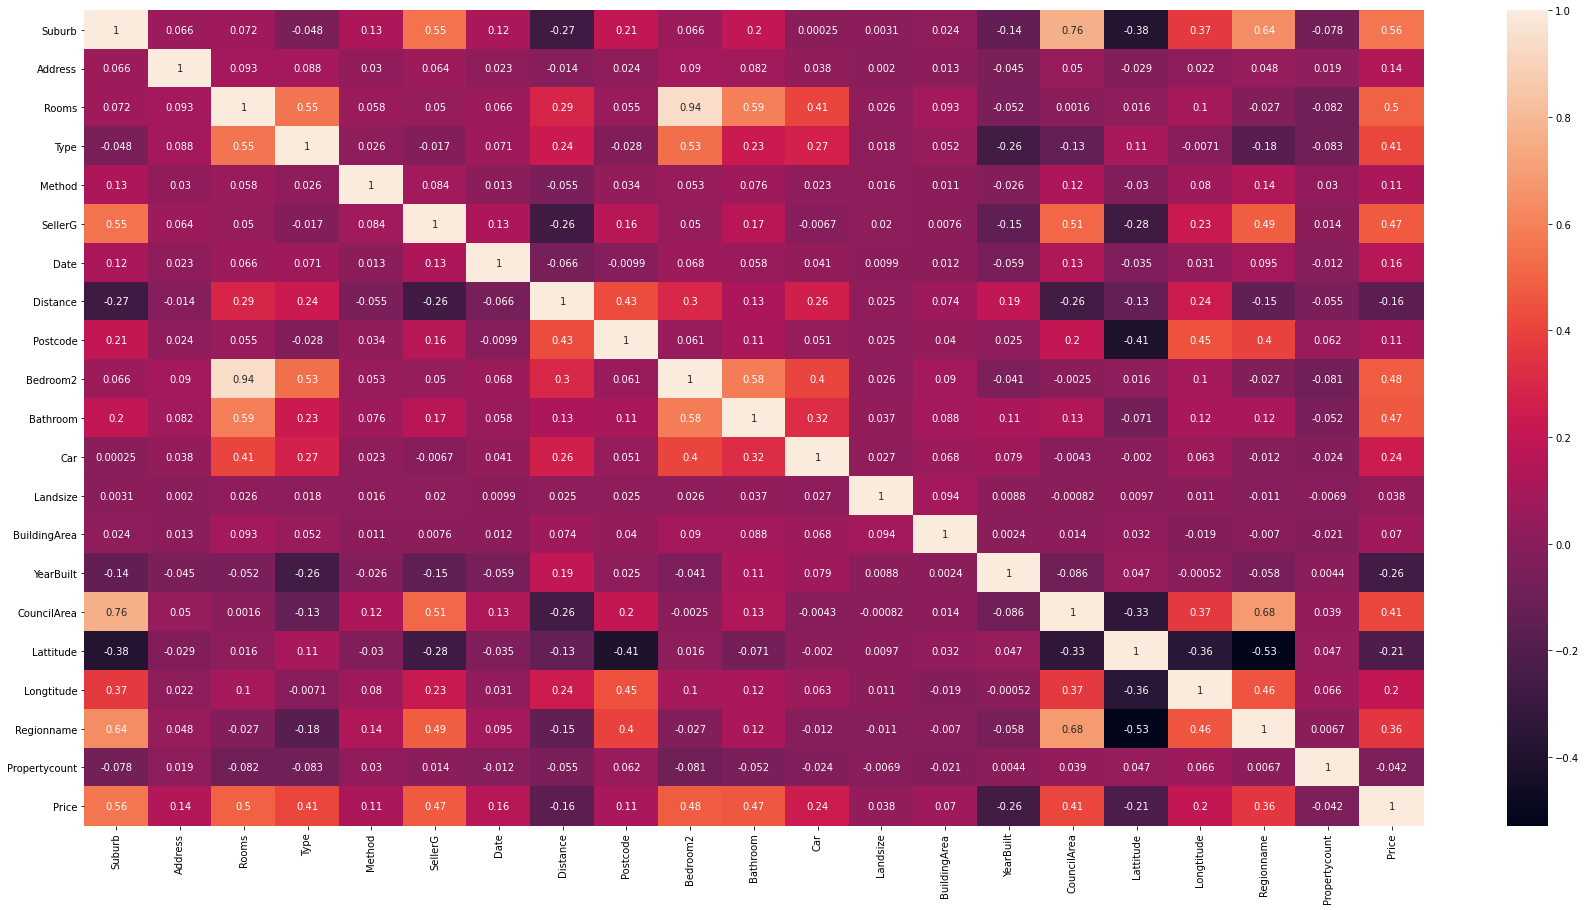

In [20]:
plt.figure(figsize=(30,15))
sns.heatmap(data=df_encode.corr(), annot = True)

In [21]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [22]:
df['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [23]:
df['Bedroom2'].value_counts()

3.0     5896
2.0     3737
4.0     2601
1.0      691
5.0      556
6.0       63
0.0       16
7.0       10
8.0        5
9.0        3
10.0       1
20.0       1
Name: Bedroom2, dtype: int64

In [24]:
df['Bathroom'].value_counts()

1.0    7512
2.0    4974
3.0     917
4.0     106
0.0      34
5.0      28
6.0       5
8.0       2
7.0       2
Name: Bathroom, dtype: int64

In [25]:
df['CouncilArea'].value_counts()

Moreland             2532
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

In [26]:
df['SellerG'].value_counts()

Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
CASTRAN             1
Roger               1
Follett             1
Direct              1
Luxe                1
Name: SellerG, Length: 268, dtype: int64

In [27]:
df['Rooms'].value_counts()

3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64

## Univariate Analysis

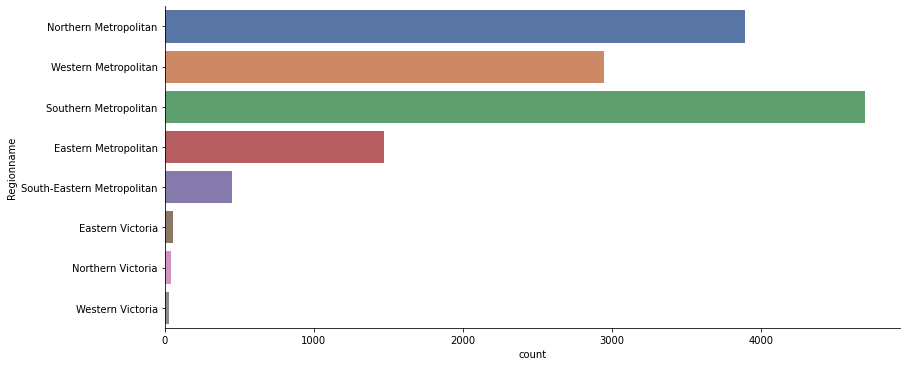

In [28]:
sns.catplot(y='Regionname', kind='count', data=df, aspect=2.5, palette = 'deep')

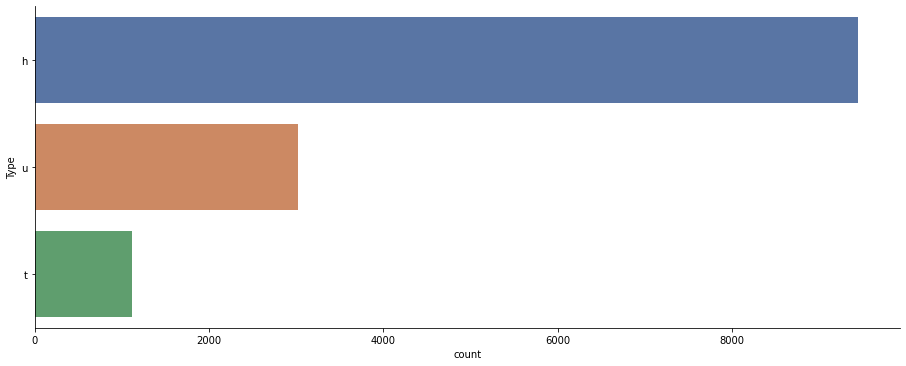

In [29]:
sns.catplot(y='Type', kind='count', data=df, aspect=2.5, palette = 'deep')

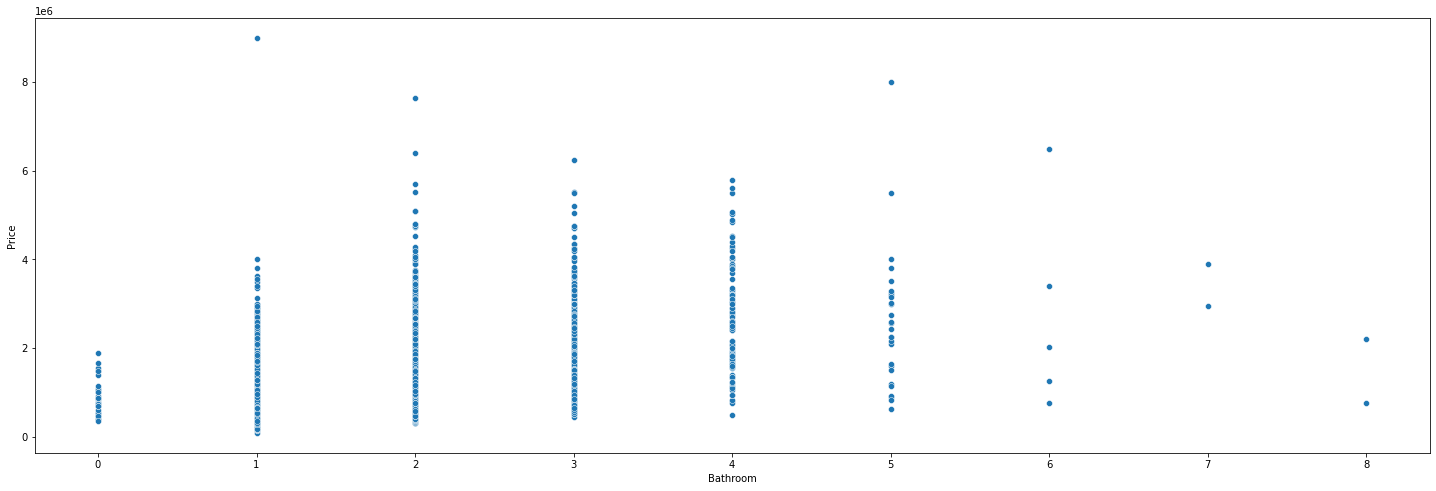

In [30]:
fig,ax = plt.subplots()
fig.set_size_inches(25, 8)

ax = sns.scatterplot(x='Bathroom',y='Price',data=df)

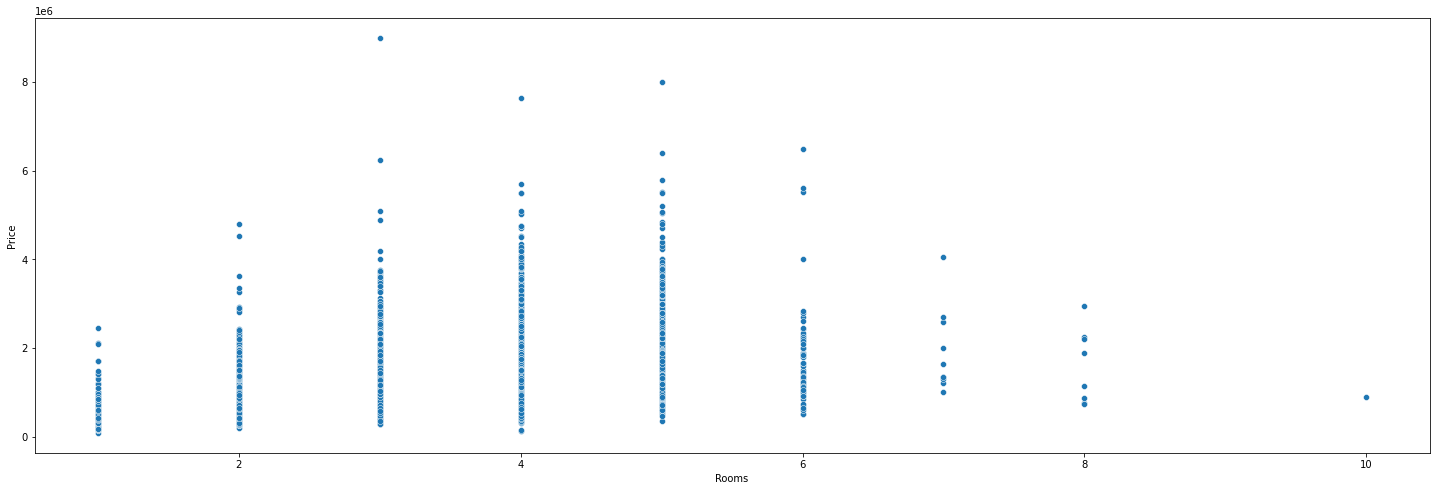

In [31]:
fig,ax = plt.subplots()
fig.set_size_inches(25, 8)

ax = sns.scatterplot(x='Rooms',y='Price',data=df)

## Preprocessing

In [32]:
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,126.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [33]:
df1 = df.copy()
df1.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,126.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [34]:
#feature Selection

df_fs= df1[['Suburb','Rooms','Type','SellerG','Regionname','CouncilArea','Bathroom','Bedroom2','Price']]

In [35]:
df_fs.head(2)

,Suburb,Rooms,Type,SellerG,Regionname,CouncilArea,Bathroom,Bedroom2,Price
0,Abbotsford,2,h,Biggin,Northern Metropolitan,Yarra,1.0,2.0,1480000.0
1,Abbotsford,2,h,Biggin,Northern Metropolitan,Yarra,1.0,2.0,1035000.0


oh_encode = ['Suburb','SellerG','Regionname','CouncilArea','Type']

In [36]:
#One hot encoder column type
df_encode = pd.get_dummies(df_fs, columns=['Suburb','SellerG','Regionname','CouncilArea','Type'])

## Scalling

In [37]:
from sklearn.preprocessing import RobustScaler
scales = RobustScaler()
scales.fit_transform(np.array(df_encode['Price']).reshape(-1,1))

array([[0.84852941],
       [0.19411765],
       [0.82647059],
       ...,
       [0.39264706],
       [2.34852941],
       [0.56176471]])

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

X = df_encode.drop(columns=['Price'])
y = df_encode['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1998)

In [39]:
X_train.shape

(9506, 629)

In [40]:
X_test.shape

(4074, 629)

## Modelling 

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [42]:
#decision tree 
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(y_pred)

[1480833.33333333  900000.          411000.         ... 1052500.
  613625.         2033000.        ]


In [43]:
#model evaluation
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

256684.58879542846

In [44]:
#rf
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred1 = rf.predict(X_test)
print(y_pred1)

[1420449.01785714 1075048.57142857  662206.7718254  ... 1055338.32251082
  617909.57738095 1782437.78571429]


In [45]:
#model evaluation
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred1)

221506.74998648322

## Optimasi model

In [46]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae

Membandingkan MAE dengan beberapa nilai ```max_leaf_nodes``` untuk menemukan jumlah leaf paling optimum

In [47]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    leaf_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(f'Max leaf nodes: {max_leaf_nodes} \t Mean Absolute Error: {int(leaf_mae)}')

Max leaf nodes: 5 	 Mean Absolute Error: 321166
Max leaf nodes: 50 	 Mean Absolute Error: 274824
Max leaf nodes: 500 	 Mean Absolute Error: 245220
Max leaf nodes: 5000 	 Mean Absolute Error: 255571


In [48]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f'Mean Absolute Error: {int(mean_absolute_error(y_test, y_pred))}')

Mean Absolute Error: 222026
